# Data Fitting with Least Squares

In [1]:
#keep
import numpy as np
import numpy.linalg as npla
import scipy.linalg as spla
import matplotlib.pyplot as pt
%matplotlib inline

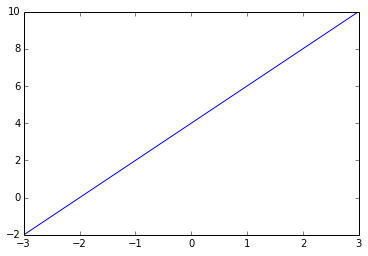

In [2]:
#keep
a = 4
b = 2

def f(x):
    return a + b*x

plot_grid = np.linspace(-3, 3, 100)

pt.plot(plot_grid, f(plot_grid))

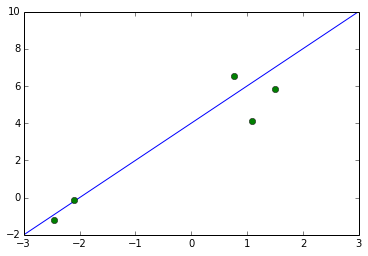

In [3]:
#keep
npts = 5

np.random.seed(22)
points = np.linspace(-2, 2, npts) + np.random.randn(npts)
values = f(points) + 0.3*np.random.randn(npts)*f(points)

pt.plot(plot_grid, f(plot_grid))
pt.plot(points, values, "o")

What's the system of equations for $a$ and $b$?

---------------
Now build the system matrix $A$:

In [4]:
A = np.array([
    1+0*points,
    points,
    ]).T
A

array([[ 1.        , -2.09194992],
       [ 1.        , -2.46335065],
       [ 1.        ,  1.08179168],
       [ 1.        ,  0.76067483],
       [ 1.        ,  1.50887086]])

What's the right-hand side vector?

-------------
Now solve the least-squares system:

In [5]:
Q, R = npla.qr(A, "complete")

In [6]:
#keep
print(A.shape)
print(Q.shape)
print(R.shape)

m, n = A.shape

(5, 2)
(5, 5)
(5, 2)


Determine $x$. Use `spla.solve_triangular(A, b, lower=False)`.

In [7]:
x = spla.solve_triangular(R[:n], Q.T.dot(values)[:n], lower=False)

Recover the computed $a$, $b$:

In [8]:
#keep
a_c, b_c = x

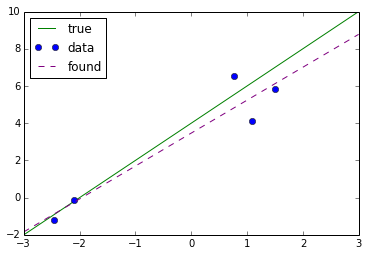

In [9]:
#keep
def f_c(x):
    return a_c + b_c * x

pt.plot(plot_grid, f(plot_grid), label="true", color="green")
pt.plot(points, values, "o", label="data", color="blue")
pt.plot(plot_grid, f_c(plot_grid), "--", label="found",color="purple",)

if 0:
    # show residual components
    pt.vlines(points,
                np.minimum(f_c(points), values),
                np.maximum(f_c(points), values),
                color="red", lw=2)

pt.legend(loc="best")

* If we enable 'show residual components above', what will appear?
* Is it possible for the residual to involve the 'true data'?

------

* What should happen if we change the number of data points?
* What happens if there are lots of outliers?
* What should happen if we don't add noise?
* What about a bigger model?
* What about different functions in the model?